In [1]:
import sys, os
from pathlib import Path
ROOT = Path.cwd().parents[1]
sys.path.insert(0, str(ROOT))

from src import preprocessing as pre
from src import metrics as metrics
from src import timeline as timeline
from src import visualizations as viz
from src import shape as shape
from mplsoccer import Pitch, VerticalPitch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
background_color = '#F5F5F5'
primary_text_color = '#000000'
secondary_text_color = '#757575'
primary_color = '#649CCB'
highlight_color = "#203490"

cmap = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           [background_color, "#203490"], N=200)

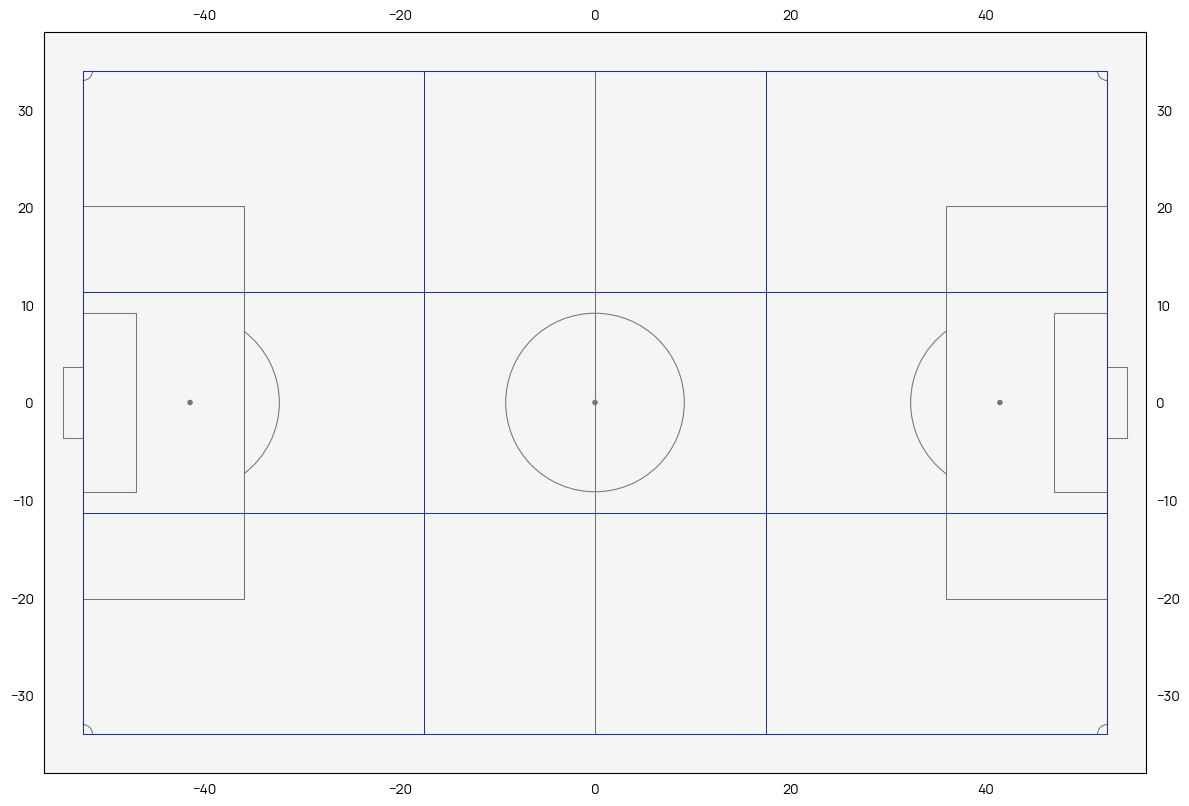

In [3]:
pitch = Pitch(pitch_type='skillcorner',
                      line_zorder=10,
                      line_color=secondary_text_color,
                      half=False,
                    pitch_color=background_color,
                      linewidth=.75,
                      axis=True,label=True,
                      corner_arcs=True,
                      goal_type='box',
                      pitch_length=105, pitch_width=68)
fig, ax = pitch.draw(figsize=(12, 10))

plt.vlines(52.5, -34, 34, colors=highlight_color, linewidth=0.75, zorder=10)
plt.vlines(-52.5, -34, 34, colors=highlight_color, linewidth=0.75, zorder=10)

plt.vlines(-17.5, -34, 34, colors=highlight_color, linewidth=0.75, zorder=10)
plt.vlines(17.5, -34, 34, colors=highlight_color, linewidth=0.75, zorder=10)

plt.hlines(34, -52.5, 52.5, colors=highlight_color, linewidth=0.75, zorder=10)
plt.hlines(-34, -52.5, 52.5, colors=highlight_color, linewidth=0.75, zorder=10)

plt.hlines(-11.34, -52.5, 52.5, colors=highlight_color, linewidth=0.75, zorder=10)
plt.hlines(11.35, -52.5, 52.5, colors=highlight_color, linewidth=0.75, zorder=10)

In [4]:
match_id = 1886347
df, metadata = pre.load_tracking_as_long_dataframe(match_id, True)
home, away = metadata.teams

team_id = home.team_id
print(team_id)



4177


In [5]:
df = pre.prepare_team_tracking(2017461, 868, True, 
                          include_match_time = False, 
                          include_in_possession = False,  
                          include_ball_zones = False,
                          exclude_goalkeeper=False)

In [6]:
df = pre.exclude_goalkeepers_for_match(df)





/Users/martin/Documents/Projects/SkillCornerHackaton/analytics_cup_research/src/preprocessing.py:194: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pick_gk_for_frame)


In [7]:
df = pre.add_match_time(df)
df = pre.add_in_possession_column(df, team_id)
df = pre.add_ball_zones(df)

In [8]:
shapes = shape.compute_average_team_shape(df, top_n_players=10)

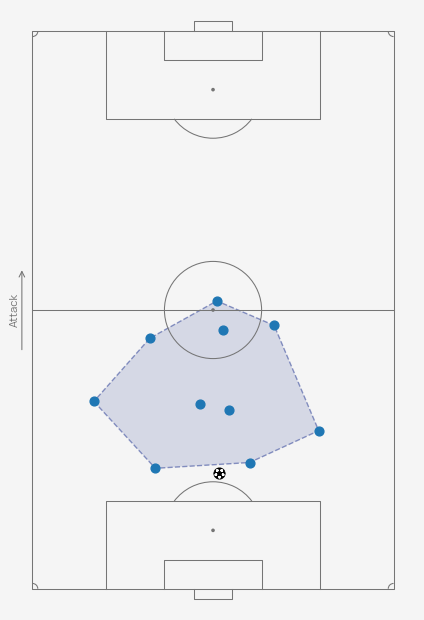

In [9]:
zone_shape = viz.plot_team_shape_for_zone(shapes, 0, 1, 'out')

# viz.plot_team_shape_for_zone(shapes, 0, 0, 'out')

In [10]:
df_frame_metrics = metrics.compute_match_metrics_by_frame(df)


zone_metrics = metrics.compute_zone_metrics(df_frame_metrics)
metrics_by_zone = metrics.build_metrics_by_zone_possession(zone_metrics)




In [11]:
matrix = viz.build_zone_matrix_from_metrics(
        metrics_by_zone,
        "line_height", "out"
    )
matrix

array([[-23.88104851, -25.92289529, -30.87040308],
       [ -7.31237456,  -4.29234761,  -8.15485615],
       [ 12.46451753,  15.49626614,  12.29892637]])

(<Figure size 800x1200 with 2 Axes>, <Axes: >)

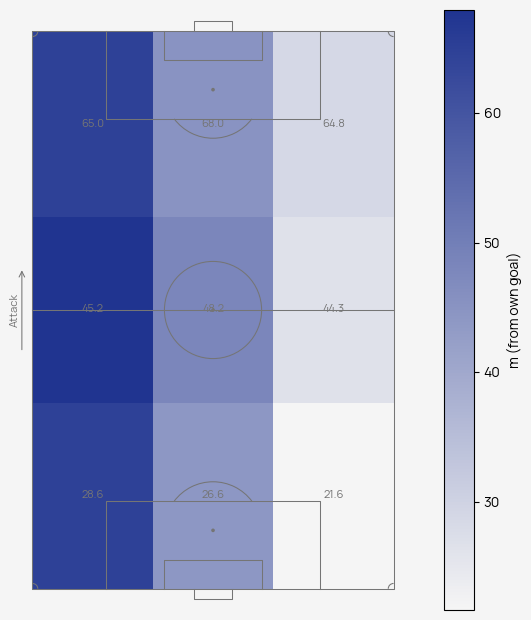

In [12]:
# Heatmap de compactness in/out
viz.plot_zone_heatmap(metrics_by_zone, "line_height", "out")